<a href="https://colab.research.google.com/github/AnshRockstar/NYC-Taxi-Trip-Duration-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

In [6]:
#Install Library  use to calculate the haversine distance 

!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a id=library></a>
## Import libraries

In [7]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from haversine import haversine
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id=data></a>
## Import Dataset

In [9]:
#import the data from a csv file.
path ="/content/drive/MyDrive/NYC Taxi Trip Time Predication/NYC Taxi Data.csv"
nyc_df =  pd.read_csv(path)

<a id=explore></a>
## Data Exploration
We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [10]:
pip freeze > requirement.txt

In [11]:
nyc_df.shape

(1458644, 11)

There are 1458644 rows and 11 columns

In [12]:
nyc_df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

### Feature details:
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
- Categorizing the features :

- Let's divide features into categories:

- Geographical: pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude

- Time related: pickup_datetime, dropoff_datetime

- Identifier: id(not useful for analysis)

- Others: vendor_id, passenger_count, store_and_fwd_flag


### Label details:
- trip_duration - duration of the trip in seconds 




In [13]:
# checking data-types of variables to identify the numerical and categorical variables
nyc_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [14]:
nyc_df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

Pasenger count varies from 0 to 9.
Trip duration has max value of 3526282 seconds almost 979.5 hours and minimum 1 second. This definetly has outliers present so we'll remove them

### NAN or Missing Values:

It is wise to check for any missing value present in our dataset as many modelling procedures may break down. if there's any missing value present in our dataset the corresponding rows will either have to be removed completely from dataset or the values need to be estimated somehow

In [15]:
#Check for NaN values
nyc_df['trip_duration'].isnull().sum()

0

In [16]:
#Check for duplicated values
nyc_df.drop_duplicates(inplace=True)
nyc_df.shape

(1458644, 11)

- There are approx **1.5 million records** in our dataset.
- There is no NaN/NULL record in the dataset, So we dont have to impute any record.


In [17]:
nyc_df['passenger_count'].value_counts().reset_index()

index  passenger_count
0      1          1033540
1      2           210318
2      5            78088
3      3            59896
4      6            48333
5      4            28404
6      0               60
7      7                3
8      9                1
9      8                1

In [18]:
nyc_df[nyc_df['passenger_count']==0].count()

id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

In [19]:
nyc_df=nyc_df[nyc_df['passenger_count']!=0]

In [20]:
nyc_df["pickup_datetime"][0]

'2016-03-14 17:24:55'

In [21]:
#Convert timestamp to datetime format to fetch the other details as listed below
nyc_df['pickup_datetime']=pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']=pd.to_datetime(nyc_df['dropoff_datetime'])
nyc_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435


 ### Exploratory Data Analysis



[Text(0.5, 1.0, 'Distribution Plot for Trip Duration')]

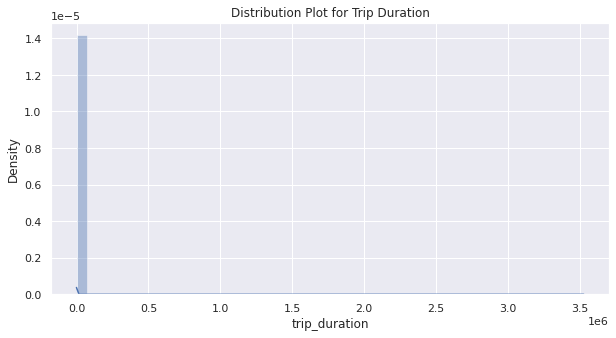

In [22]:
#Dependent variable 'trip_duration'
plt.figure(figsize=(10,5))
sns.distplot(nyc_df['trip_duration'],color="b").set(title='Distribution Plot for Trip Duration')

[Text(0.5, 1.0, 'Distribution Plot with Log Transformation for Trip Duration')]

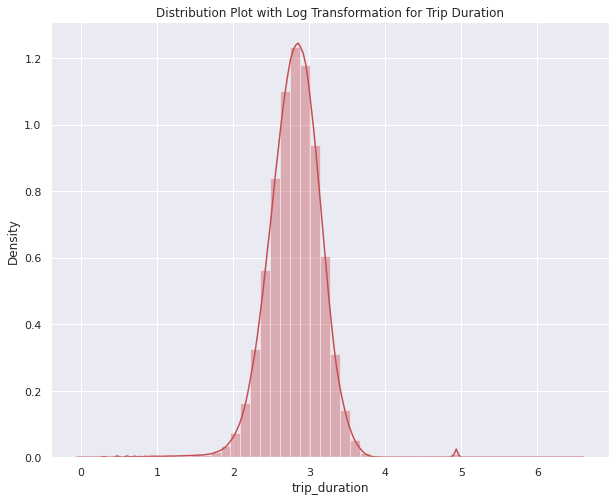

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(np.log10(nyc_df['trip_duration']),color="R").set(title='Distribution Plot with Log Transformation for Trip Duration')

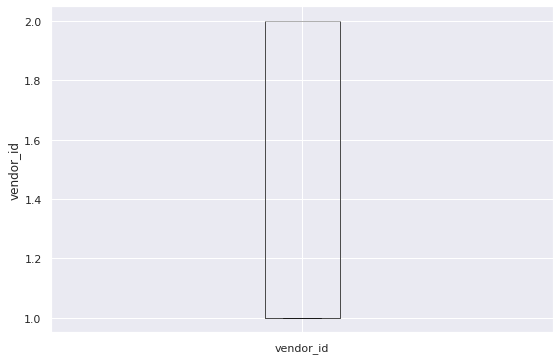

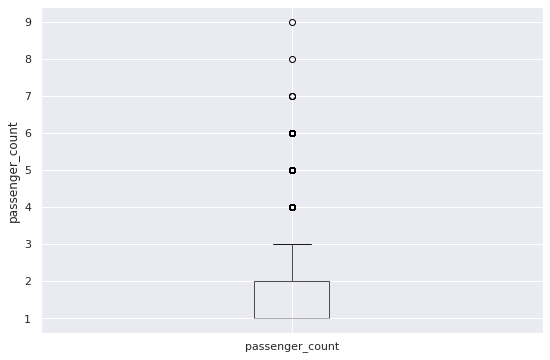

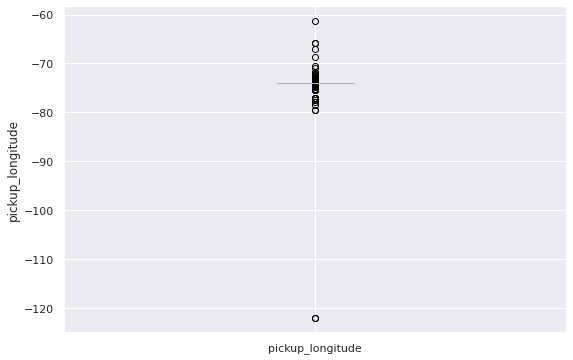

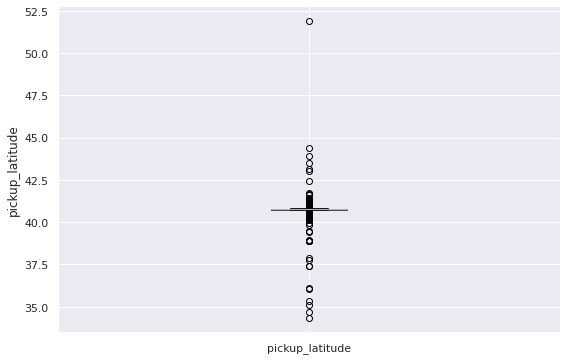

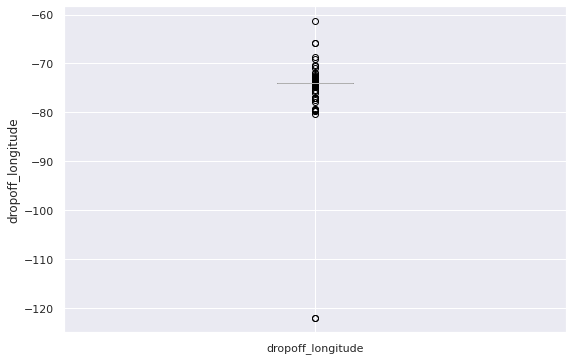

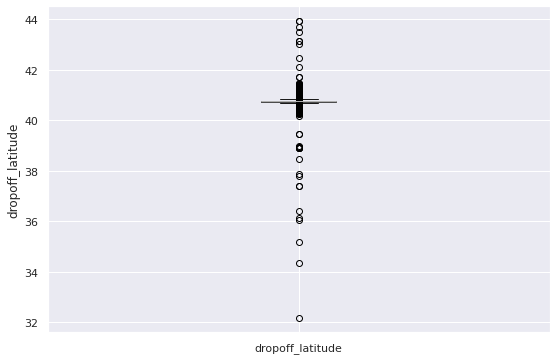

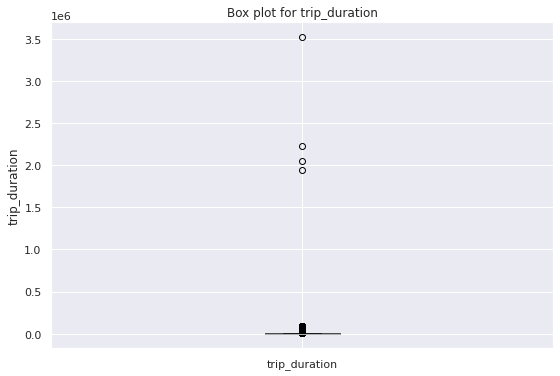

In [24]:
# plot a boxplot for the label by each numerical feature  
for col in nyc_df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  nyc_df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.title("Box plot for trip_duration")
plt.show()

Vendor ID has no outlier.

In passenger count 4 and more passengers are being treated as outliers.

pickup_longitude and pickup_latitude has outliers as well.

dropoff_longitude and dropoff_latitude has outliers too.

Our target variable trip_duration has alot of outliers

Checking consitency of trip_duration

from the box plot we see that there are few outlier having very large value. we have to remove those outlier. but first let check the consitency of feature "trip duration". To do so we calculate the difference between pick and dropoff time.

In [25]:
# creating a function that will out trip duration from pick and dropoff time
def calculate_trip_duration(pickup,dropoff):
    return (dropoff-pickup).total_seconds()

In [26]:
# creating a feature which stores this calculated trip duration
nyc_df['calculate_trip_duration']=nyc_df.apply(lambda x: calculate_trip_duration(x['pickup_datetime'],x['dropoff_datetime']),axis=1)

In [27]:
# checking for consistency by comparing trip duration with calculated trip duration
(nyc_df['calculate_trip_duration']==nyc_df['trip_duration']).value_counts()

True    1458584
dtype: int64

Here, we see that there the trip duration is consistent with the calculated trip duration. so, this large value are purely an outlier.

In [28]:
# Dropping the feature created 
nyc_df.drop(['calculate_trip_duration'],axis=1,inplace=True)

To checked for outlier we segregate our dependent variable into different categories i.e trip whose duration is less then 1min, within 10mins,within hour,within day, within two day and more than two day

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

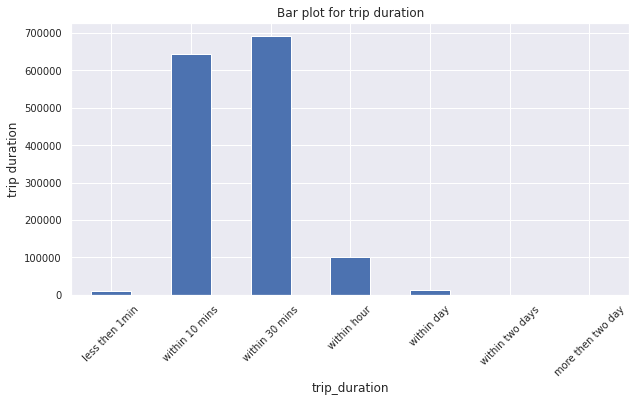

In [29]:
# segregrating the dependent variable into different categories.
plt.figure(figsize=[10,5])
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
nyc_df.groupby(pd.cut(nyc_df['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=10)
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.ylabel("trip duration")
plt.xticks(rotation=45)

In [30]:
numeric_features = nyc_df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

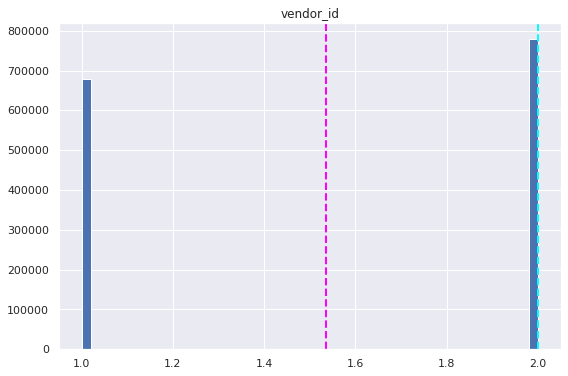

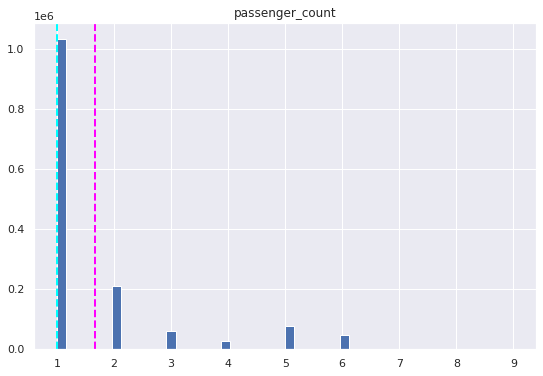

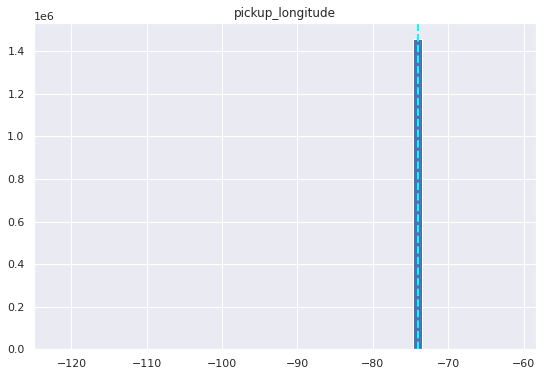

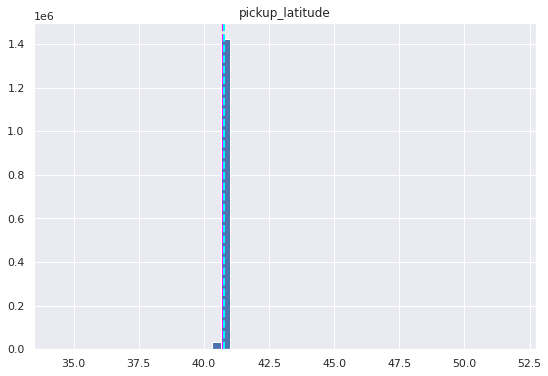

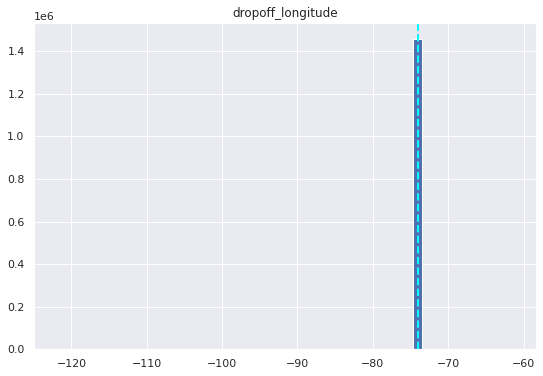

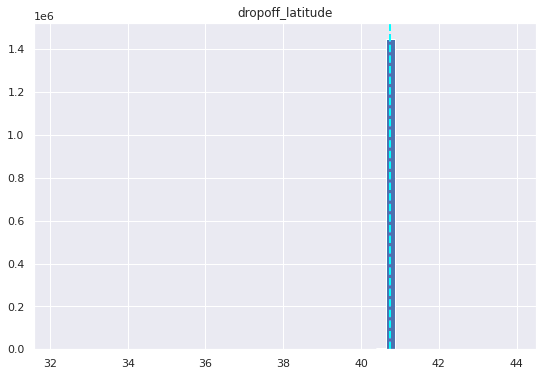

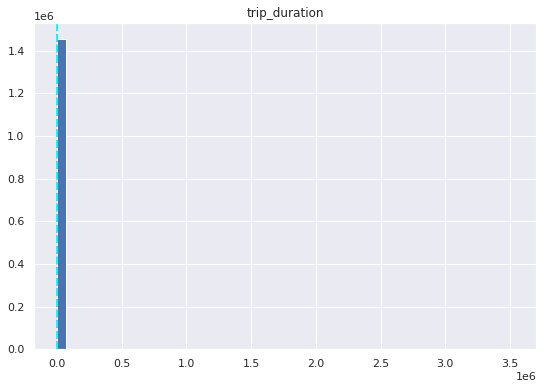

In [31]:
# plot a bar plot for each numerical feature count
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = nyc_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [32]:
nyc_df.describe().columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

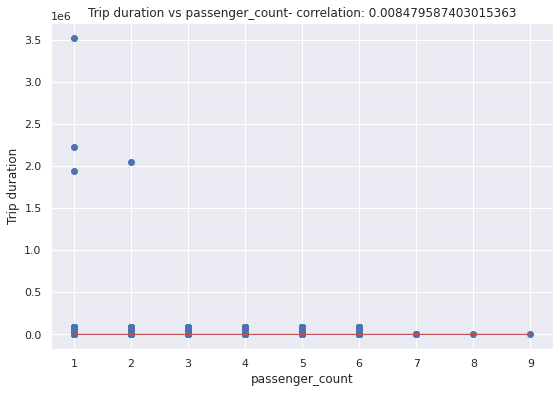

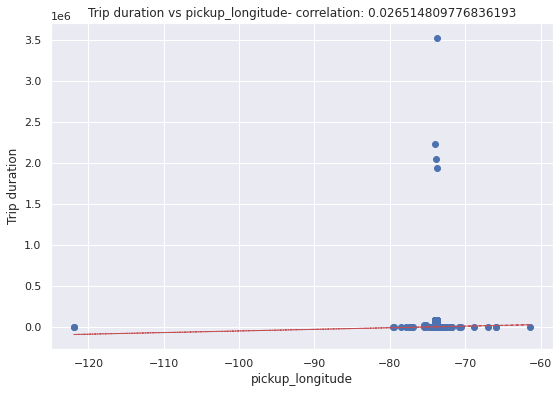

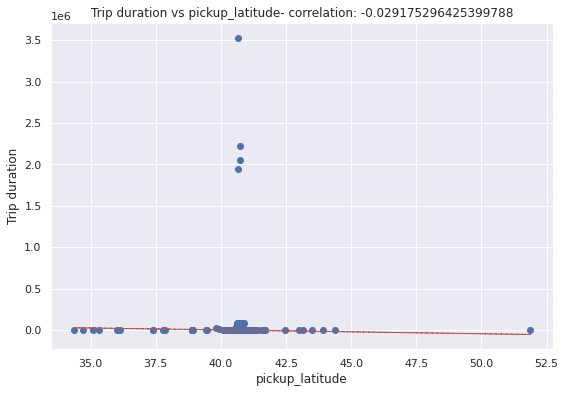

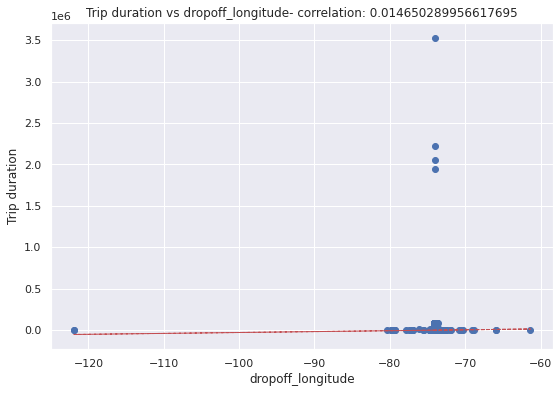

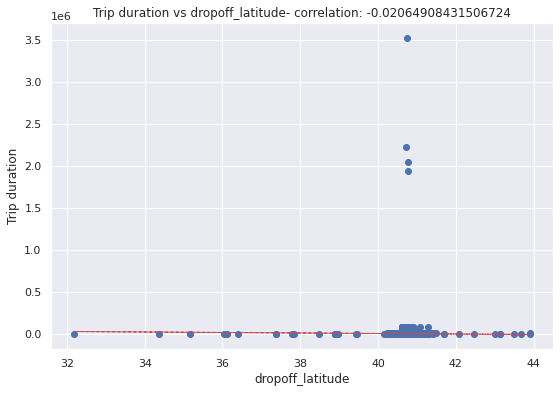

In [33]:

for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = nyc_df[col]
    label = nyc_df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(nyc_df[col], nyc_df['trip_duration'], 1)
    y_hat = np.poly1d(z)(nyc_df[col])

    plt.plot(nyc_df[col], y_hat, "r--", lw=1)

plt.show()

<a id=map></a>
# Map Visualization
***
We shall visualize the Taxi pickup locations by placing long and lat marker on the MAP of the US. So that we can analyze below questions:
 - Are all pickups constrained to NYC and it's surrounding areas?
 - Is there any unusual location of the pickup?
 - Are the lat long constrained to the land area of the US and nowhere else?

(-74.03, -73.75)

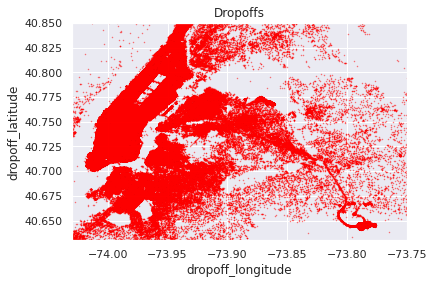

In [34]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

nyc_df.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',
          color='Red',
          s=0.2, alpha =.6)
plt.title('Dropoffs')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

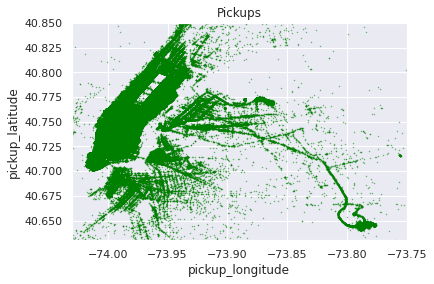

In [35]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

nyc_df.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude',
          color='green',
          s=0.2, alpha =.6)
plt.title('Pickups')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [36]:
def select_within_boundingbox(df, BB):
    return ((nyc_df["pickup_longitude"] >= BB[0]) & (nyc_df["pickup_longitude"] <= BB[1]) & 
            (nyc_df["pickup_latitude"] >= BB[2]) & (nyc_df["pickup_latitude"] <= BB[3]) &
            (nyc_df["dropoff_longitude"] >= BB[0]) & (nyc_df["dropoff_longitude"] <= BB[1]) &
            (nyc_df["dropoff_latitude"] >= BB[2]) & (nyc_df["dropoff_latitude"] <= BB[3]))
BB = (-74.3, -73.0, 40.6, 41.7)

<a id=Folium></a>
## Folium
***

folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via folium.

Concepts
folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

In [37]:
import folium   

In [38]:
nyc = folium.Map(location=[40.730610,-73.935242],zoom_start=12, control_scale=True)
nyc

In [39]:
for i in nyc_df.index[:100]:
  folium.Marker(location=[nyc_df['pickup_latitude'][i],nyc_df['pickup_longitude'][i]],icon=folium.Icon(color="blue")).add_to(nyc)
nyc

In [40]:
for i in nyc_df.index[:100]:
  folium.Marker(location=[nyc_df['dropoff_latitude'][i],nyc_df['dropoff_longitude'][i]],icon=folium.Icon(color="red", icon="info-sign")).add_to(nyc)
nyc

 ### FEATURE ENGINEERING

Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [41]:
#Calculate and assign new columns to the dataframe such as pickupday,
#dropoffday which will help us to gain more insights from the data.
nyc_df['pickup_day']=nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day']=nyc_df['dropoff_datetime'].dt.day_name()
nyc_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  
0         40.765602                  N            455     Monday      Monday  
1         40.731152                  N            663     Sunday      Sunday  
2         40.710087                  N           2124    Tuesday     Tuesday  
3         40.706718                  N            429  Wednesday   Wednesday  
4         40.782520                  N            435   Saturday    Saturday

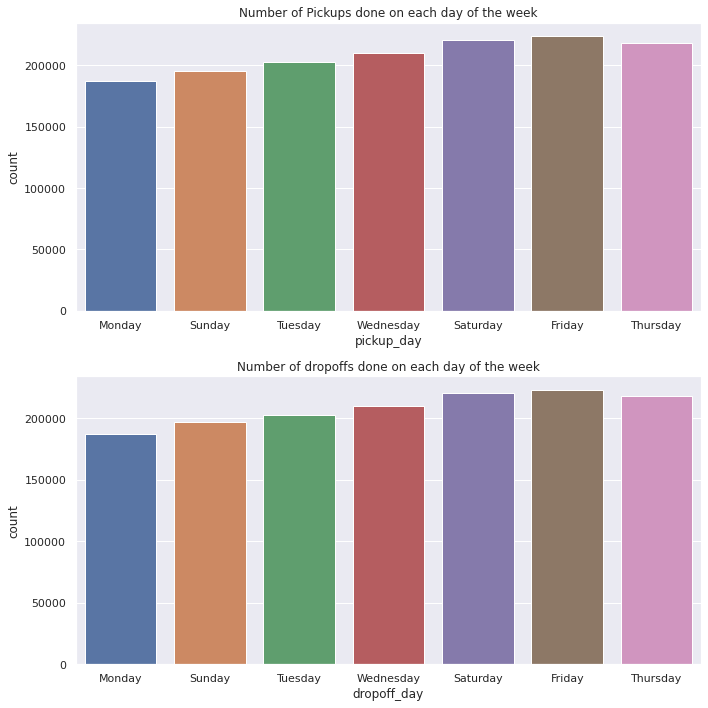

In [42]:
#Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=nyc_df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=nyc_df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')

plt.tight_layout()

Thus we see most trips were taken on Friday and Monday being the least. The distribution of trip duration with the days of the week is something to look into as well.

In [43]:
bins=np.array([0,1800,3600,5400,7200,90000])
nyc_df['duration_time']=pd.cut(nyc_df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [44]:

import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
nyc_df['pickup_timezone']=nyc_df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
nyc_df['dropoff_timezone']=nyc_df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

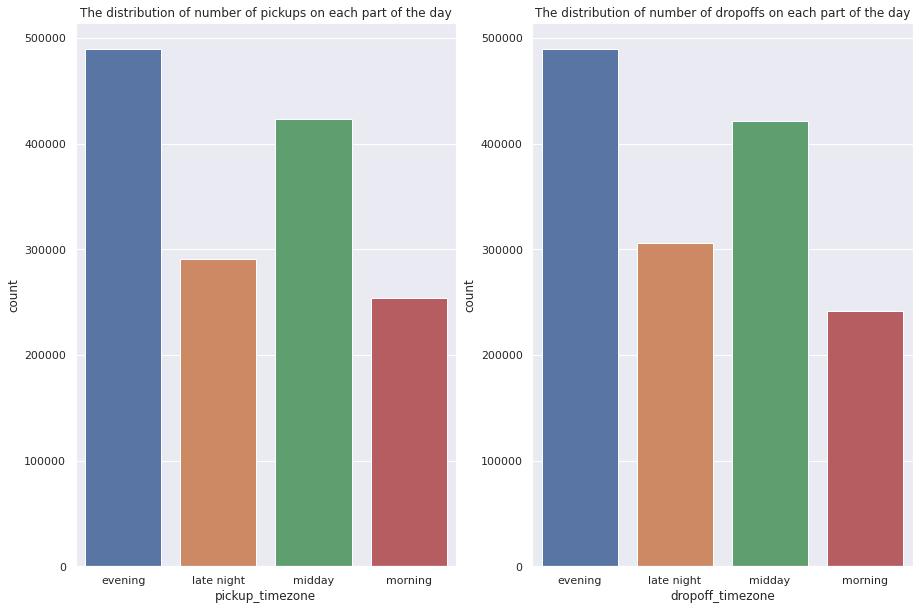

In [45]:
# Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.countplot(x='pickup_timezone',data=nyc_df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=nyc_df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

In [46]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [47]:
#Calculate distance and assign new column to the dataframe.
nyc_df["distance"] = nyc_df.apply(lambda x: calc_distance(x),axis=1)

### Outlier Detection using IQR Method


IQR=Q3-Q1

lower_limit_outlier=Q1-1.5*IQR

upper_limit_outlier=Q3+1.5*IQR¶

so we have to take the values which is greater then lower limit outlier and less then upper limit outlier
remove the outlier present in distance

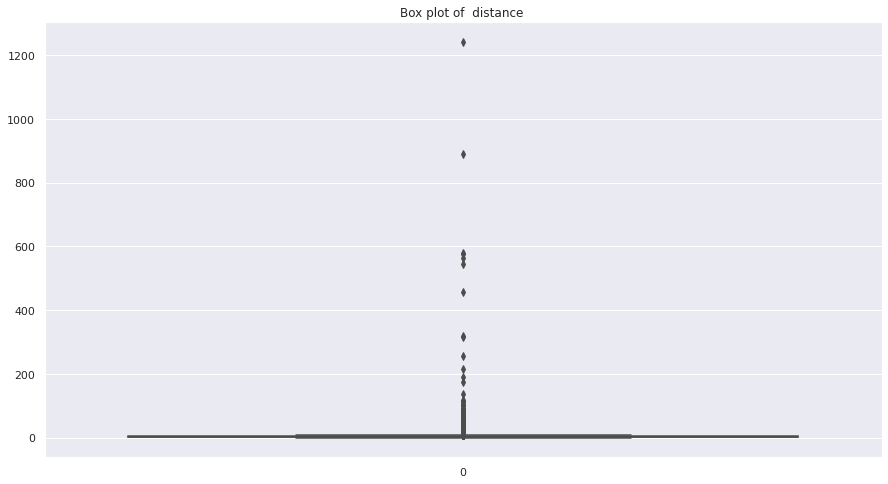

In [48]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=nyc_df['distance'], orient="v")

In [49]:
percentile_q1 = np.percentile(nyc_df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(nyc_df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(nyc_df['distance'],75)
print(percentile_q3)

1.2319108384989683
2.0937848447236194
3.875450446022868


In [50]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.7333985727868804
Upper limit for outlier  : 7.840759857308717


In [51]:
nyc_df=nyc_df[nyc_df['distance']>lower_limit_outlier]
nyc_df=nyc_df[nyc_df['distance']<upper_limit_outlier]

In [52]:
nyc_df.shape

(1317917, 17)

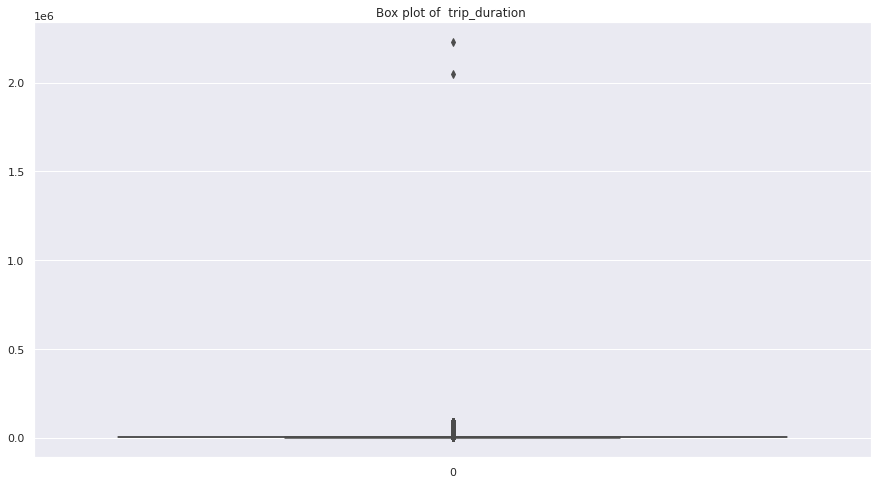

In [53]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=nyc_df['trip_duration'], orient="v")

In [54]:
percentile_q1_trip_duration = np.percentile(nyc_df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(nyc_df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(nyc_df['trip_duration'],75)
print(percentile_q3_trip_duration)

373.0
605.0
931.0


In [55]:

iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -464.0
Upper limit for outlier  : 1768.0


In [56]:

nyc_df=nyc_df[nyc_df['trip_duration']>0]
nyc_df=nyc_df[nyc_df['trip_duration']<upper_limit_outlier_trip_duration]

In [57]:
nyc_df.shape

(1277345, 17)

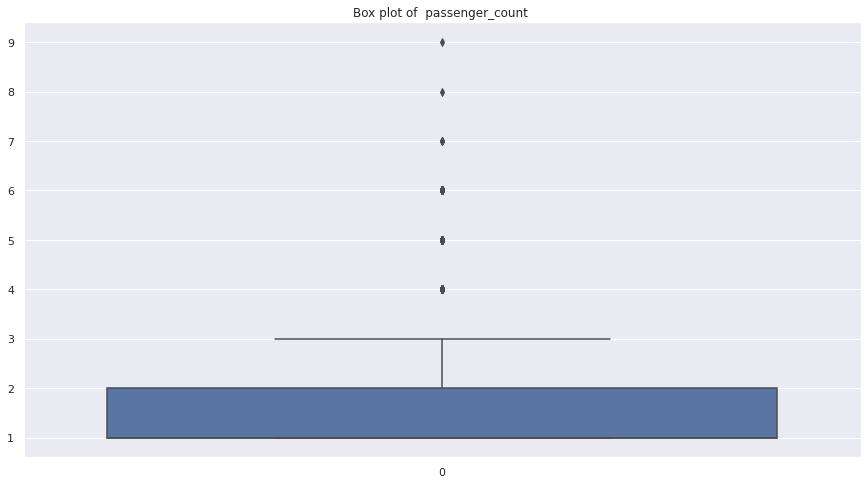

In [58]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=nyc_df['passenger_count'])

In [59]:
percentile_q1_passenger_count = np.percentile(nyc_df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(nyc_df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(nyc_df['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [60]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [61]:

nyc_df=nyc_df[nyc_df['passenger_count']>0]
nyc_df=nyc_df[nyc_df['passenger_count']<upper_limit_outlier_passenger_count]

In [62]:
nyc_df.shape

(1142605, 17)

In [63]:
#convert dattime in "%Y-%m-%d %H:%M:%S" format
nyc_df["pickup_datetime"] = pd.to_datetime(nyc_df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

In [64]:
nyc_df['Day']=nyc_df['pickup_datetime'].dt.day_name()

In [65]:
#Calculate and assign new columns to the dataframe such as year,
#month ,day_num,hour and minute which will help us to gain more insights from the data.
nyc_df["year"] = nyc_df["pickup_datetime"].apply(lambda x: x.year)
nyc_df["month"] = nyc_df["pickup_datetime"].apply(lambda x: x.month)
nyc_df["day_num"] = nyc_df["pickup_datetime"].apply(lambda x: x.day)
nyc_df["hour"] = nyc_df["pickup_datetime"].apply(lambda x: x.hour)
nyc_df["minute"] = nyc_df["pickup_datetime"].apply(lambda x: x.minute)

In [66]:
nyc_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
7  id1324603          2 2016-05-21 07:54:58 2016-05-21 08:20:49   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude store_and_fwd_flag  ...  duration_time pickup_timezone  \
0         40.765602                  N  ...            < 5         evening   
1         40.731152                  N  ...            < 5      late night   
3         40.706718                  N  ...            < 5         evening   
4         40.782520                  N  ...            < 5          midday   
7         40.760559                  N  ...            < 5         morning   

  dropoff_timezone  distance        Day  year  month day_num  hour  minute  
0          evening  1.498523     Monday  2016      3      14    17      24  
1       late night  1.805510     Sunday  2016      6      12     0      43  
3          evening  1.485500  Wednesday  2016      4       6    19      32  
4           midday  1.188590   Saturday  2016      3      26    13      30  
7          morning  5.714989   Saturday  2016      5      21     7      54  

[5 rows x 23 columns]

Converting trip duration into hours.

Taking log of our distance for normalisation of data.

Taking log of our trip duration as well to normalize it's data too.

In [67]:
nyc_df['trip_duration_hour']=nyc_df['trip_duration']/3600
nyc_df['log_distance']=np.log(nyc_df.distance)
nyc_df['log_trip_duration']=np.log(nyc_df.trip_duration_hour)

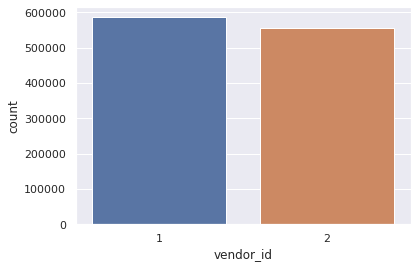

In [68]:
#Distribution of the vendor id for the taxi trip
sns.countplot(x='vendor_id',data=nyc_df)

Though both the vendors seems to have almost equal market share. But Vendor 1 is evidently more famous among the population as per the above graph.

<a id=flag></a>
## Store_and_fwd_flag
***
This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

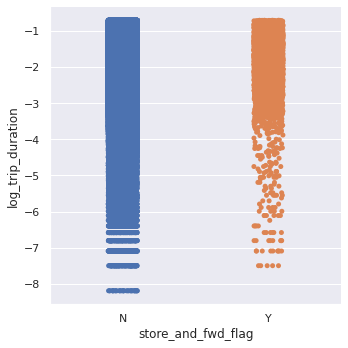

In [69]:
#Distribution of the Store and Fwd flag
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration",kind="strip",data=nyc_df)

### Observations: 
- Above result shows that only about 1% of the trip details were stored in the vehicle first before sending it to the server. This might have occured because of the following reasons:
 1. Outstation trips didn't had proper connection at the time when trip completes.
 2. Temporary loss of signals while the trip was about to finish
 3. Inconsistent signal reception over the trip duration.
 4. The GPS or mobile device battery was down when the trip finished.

Let's check further


<a id=bivariate></a>
# Bivariate Analysis
***
Bivariate analysis is used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.


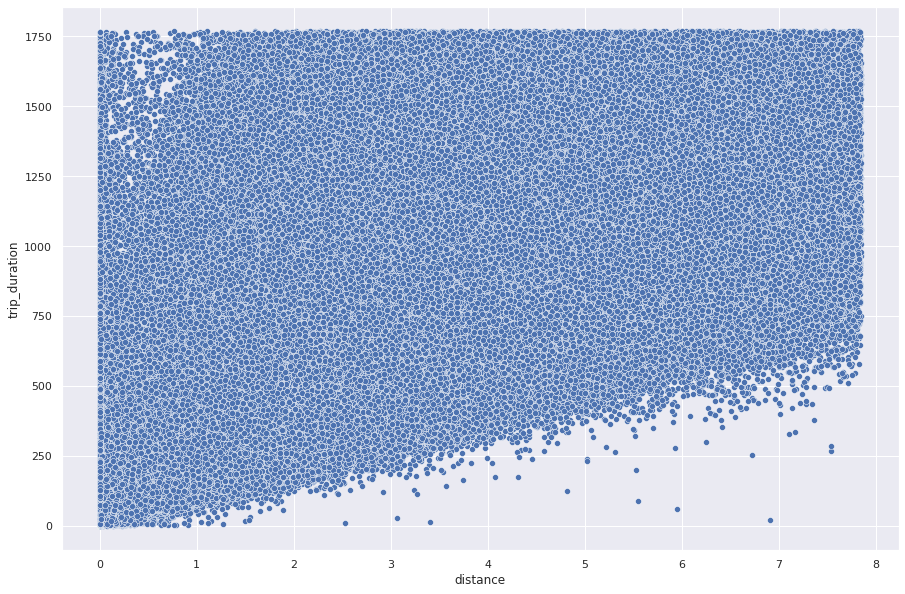

In [70]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='distance',y='trip_duration',data=nyc_df)

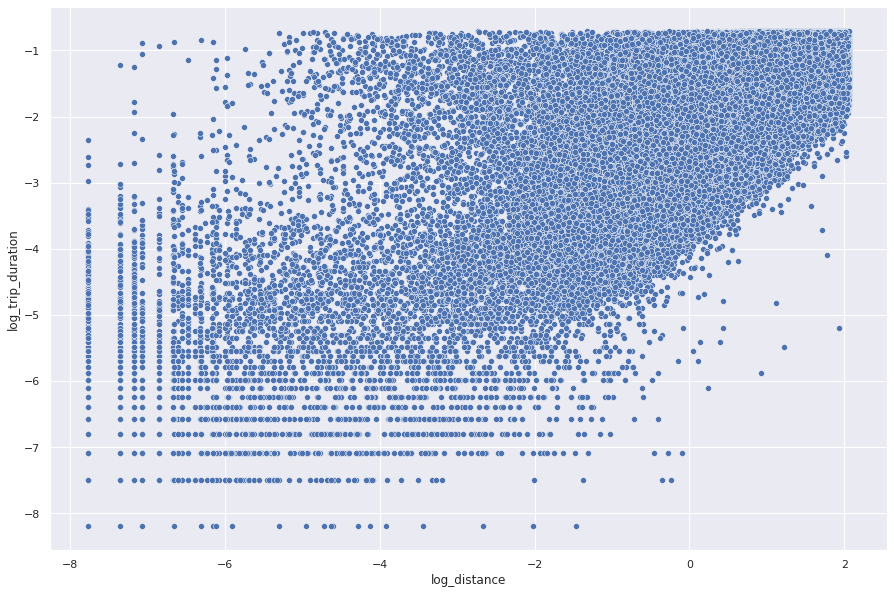

In [71]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='log_distance',y='log_trip_duration',data=nyc_df)

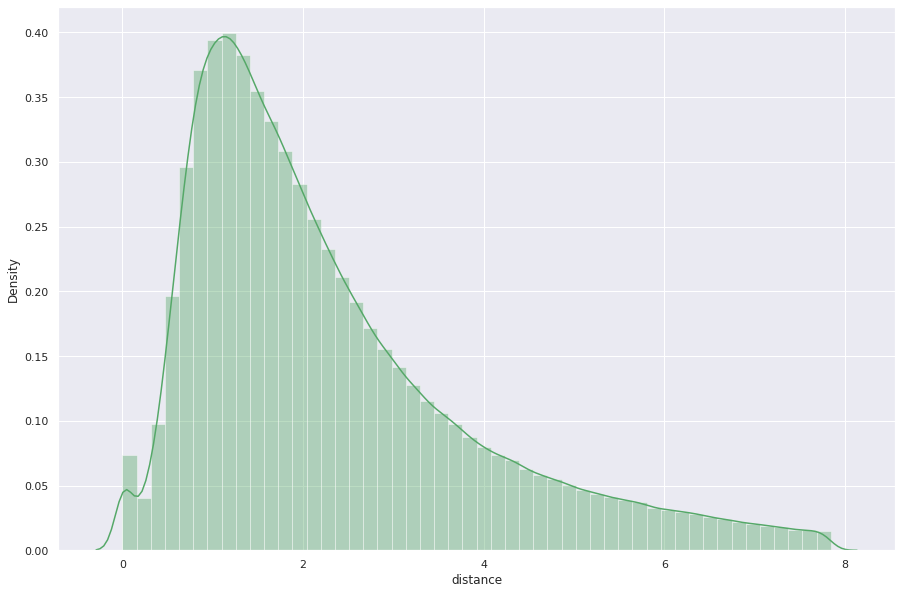

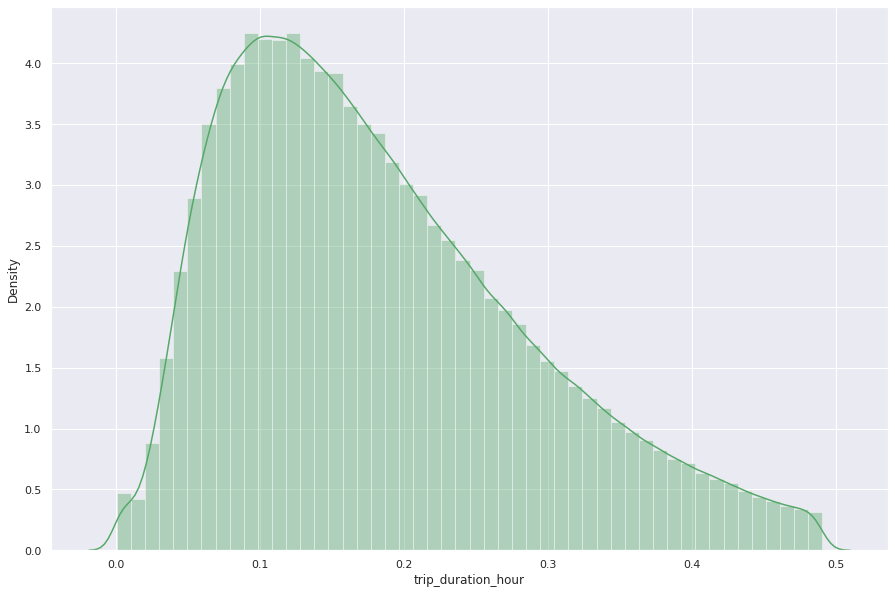

In [72]:
sample=['distance','trip_duration_hour']
for i in sample:
  plt.figure(figsize=(15,10))
  sns.distplot(nyc_df[i],color="g")

In [73]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
nyc_df= pd.get_dummies(nyc_df, columns=["store_and_fwd_flag", "Day"], prefix=["store_and_fwd_flag",'Day'])

In [74]:
#Feature for the Machine learning models
features=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday']

In [75]:
newdata=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday','trip_duration_hour']
trip_data=nyc_df[newdata]

In [76]:
nyc_df.shape

(1142605, 33)

### Split Data

Lets split our data first before scaling the features

In [77]:
#For Standarization  apply z-score
from scipy.stats import zscore
#Train test split
X = nyc_df[features].apply(zscore)[:100000]
y=nyc_df['trip_duration_hour'][:100000]

In [78]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80000, 19) (80000,)
(20000, 19) (20000,)


<a id=corr></a>
# Correlation Analysis
***
Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two or more, numerically measured, continuous variables. This analysis is useful when we need to check if there are possible connections between variables. We will utilize Heatmap for our analysis.

<a id=heatmap></a>
## Heatmap
***
A heatmap is a graphical representation of data that uses a system of color-coding to represent statistical relationship between different values.

Let's plot the relationship between the features of the **Feature selection** group first


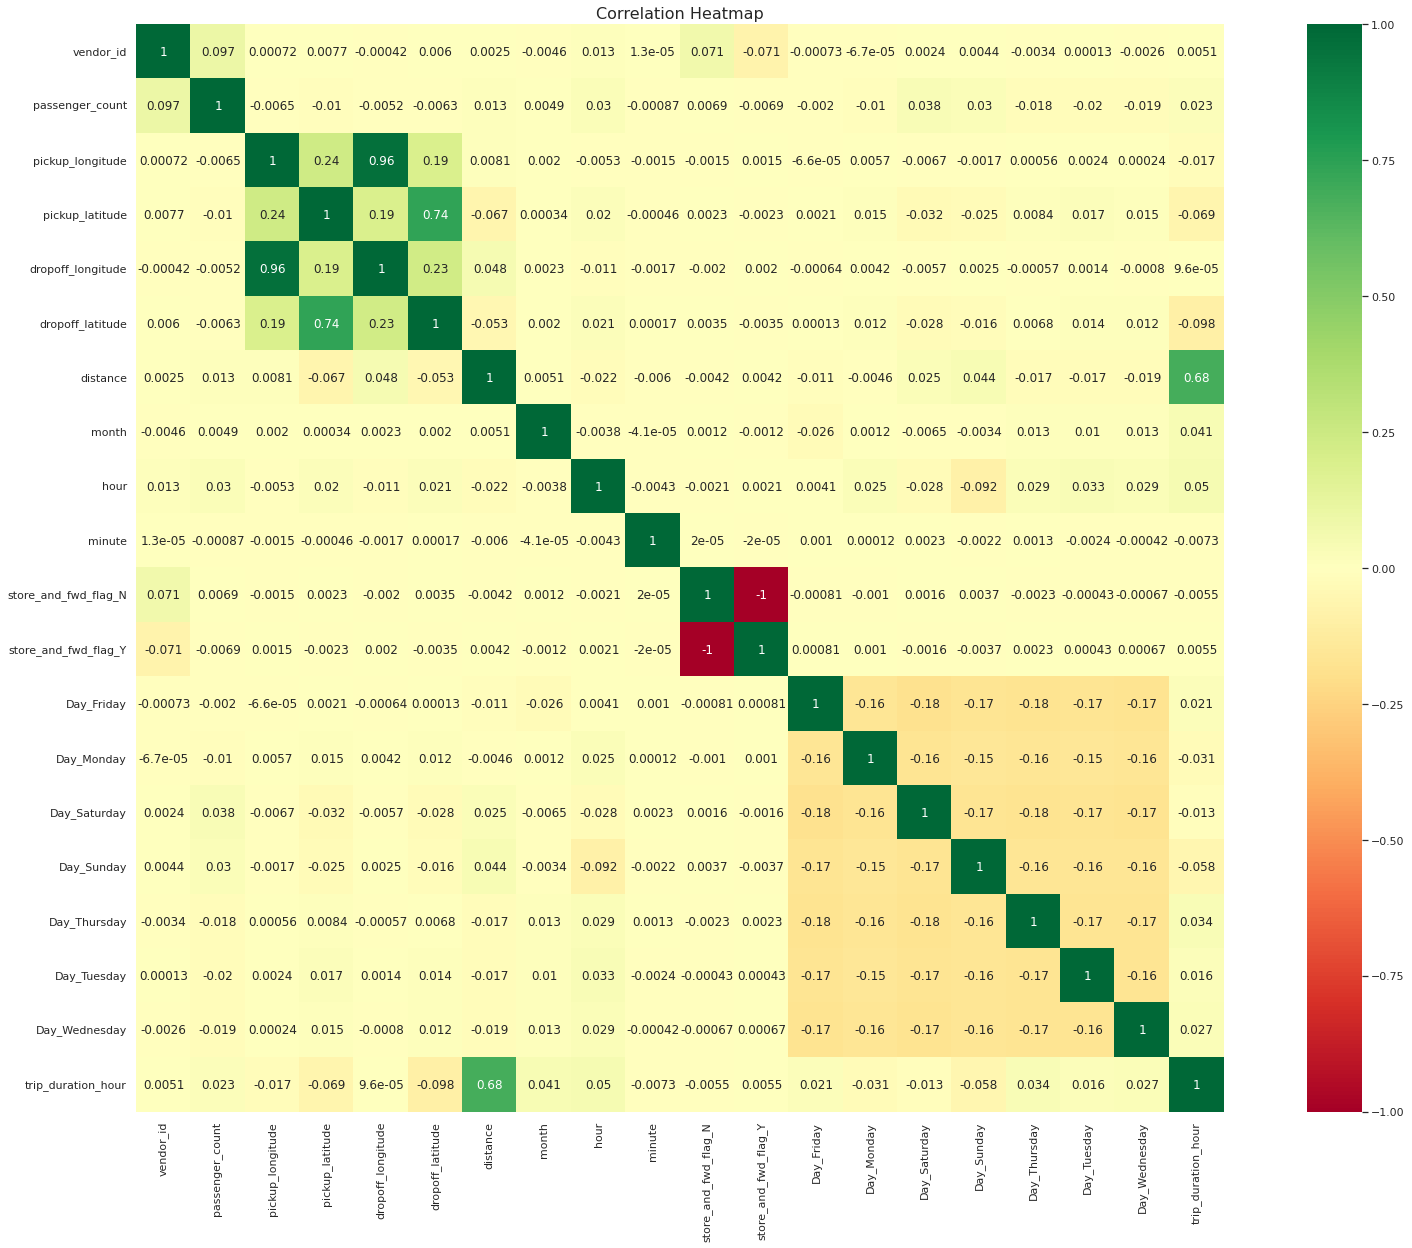

In [ ]:
plt.figure (figsize= (30,20))

sns.heatmap(trip_data.corr(), cmap='RdYlGn', annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [85]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
  ''' Take the different set of parameter and prints evaluation metrics '''
  MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
  RMSE=(np.sqrt(MSE))
  R2=(r2_score(y_true=yt,y_pred=yp))
  Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
  if disp=="on":
    print("MSE :",MSE,"RMSE :", RMSE)
    print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((yp)[:100]) 
  plt.plot((np.array(yt)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')


  
  return (MSE,RMSE,R2,Adjusted_R2) 


### Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [ ]:
# Instance the linear regression object
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.4977612627090279

In [ ]:
y_pred_train = reg.predict(X_train)

In [ ]:
y_pred_test = reg.predict(X_test)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.4977612627090279 Adjusted R2 : 0.49764195118103927


(0.0055, 0.07416198487095663, 0.4977612627090279, 0.49764195118103927)

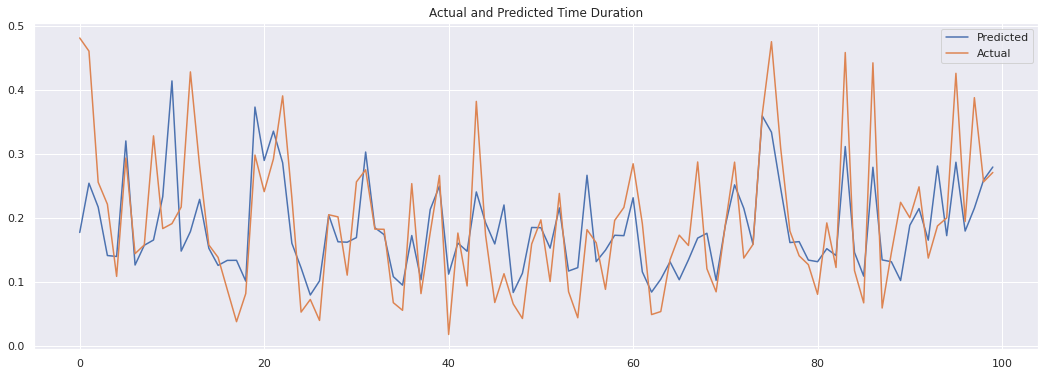

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_train)



MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.4959360664530216 Adjusted R2 : 0.4954567263760751


(0.0055, 0.07416198487095663, 0.4959360664530216, 0.4954567263760751)

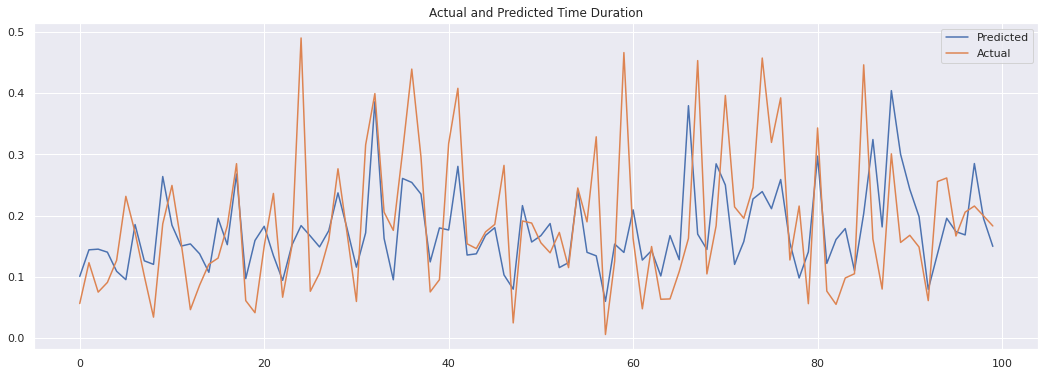

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_test)

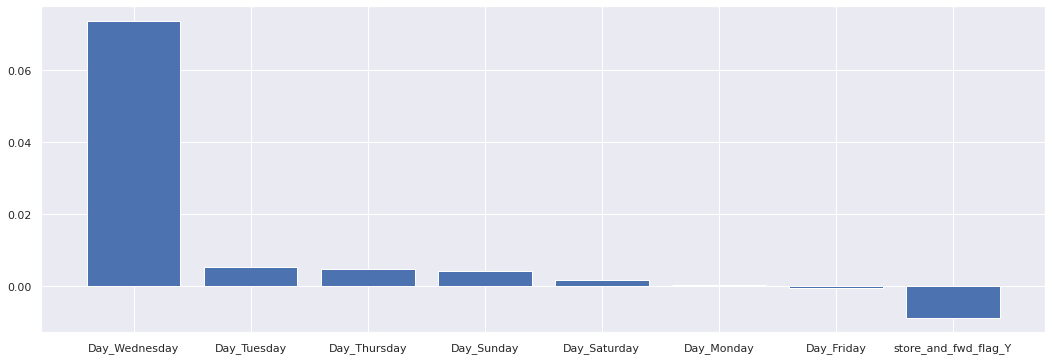

In [ ]:
#Feature Importances for Linear Regression

plt.figure(figsize=(18,6))

importance=reg.coef_
importance=np.sort(importance)
feature=features
indices=np.argsort(importance)
indices=indices[:10:-1]
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)),[feature[i] for i in indices])
plt.show()

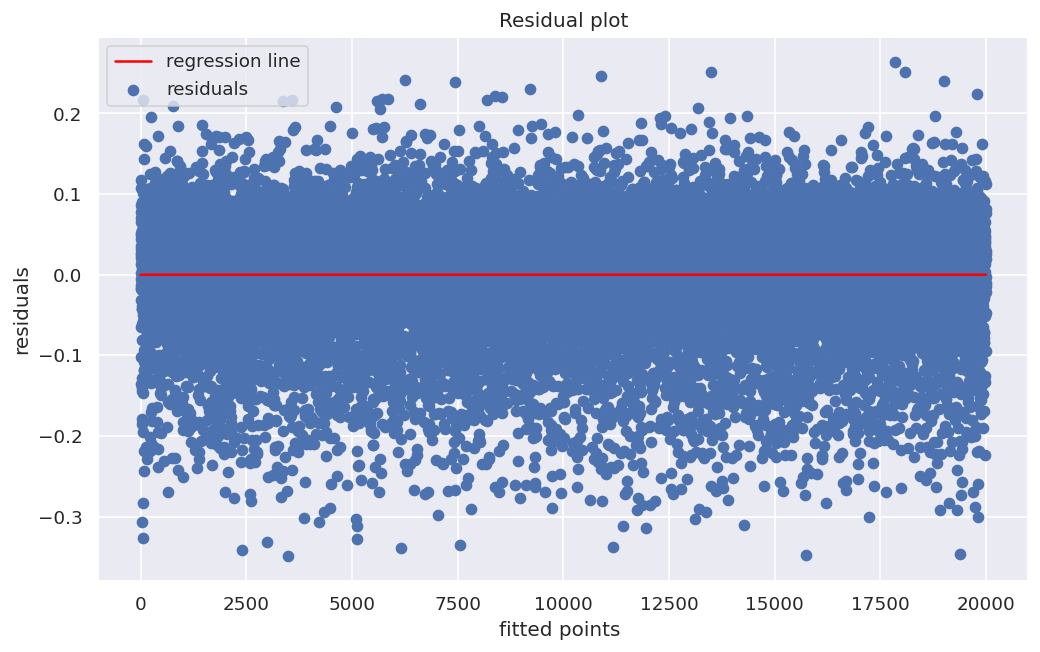

In [ ]:
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

### DECISION TREE

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
dt_model = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.2s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [ ]:
dt_grid.best_score_

0.6085952058609337

In [ ]:
dt_grid.best_score_

0.6085952058609337

In [ ]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=20)

In [ ]:
dt_optimal_model =dt_grid.best_estimator_

In [ ]:

y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

In [ ]:

y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

MSE : 0.0039 RMSE : 0.06244997998398398
R2 : 0.6437001193563989 Adjusted R2 : 0.6436154769741506


(0.0039, 0.06244997998398398, 0.6437001193563989, 0.6436154769741506)

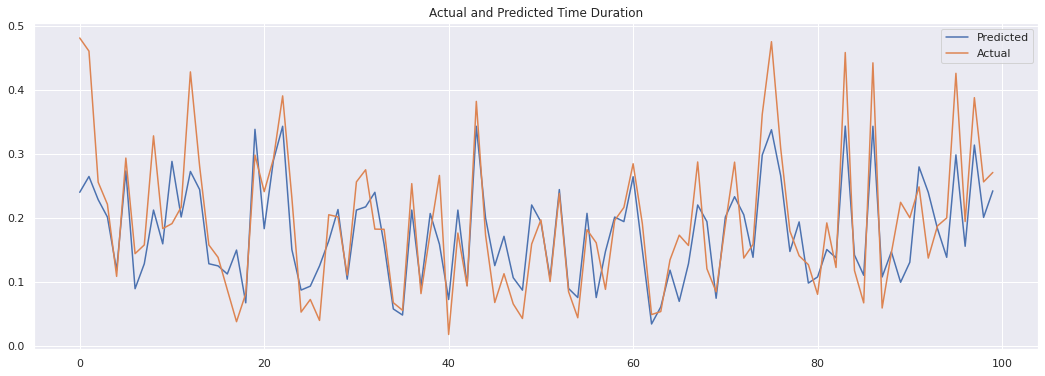

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_dt_train)

MSE : 0.0042 RMSE : 0.0648074069840786
R2 : 0.609772634819681 Adjusted R2 : 0.6094015477356758


(0.0042, 0.0648074069840786, 0.609772634819681, 0.6094015477356758)

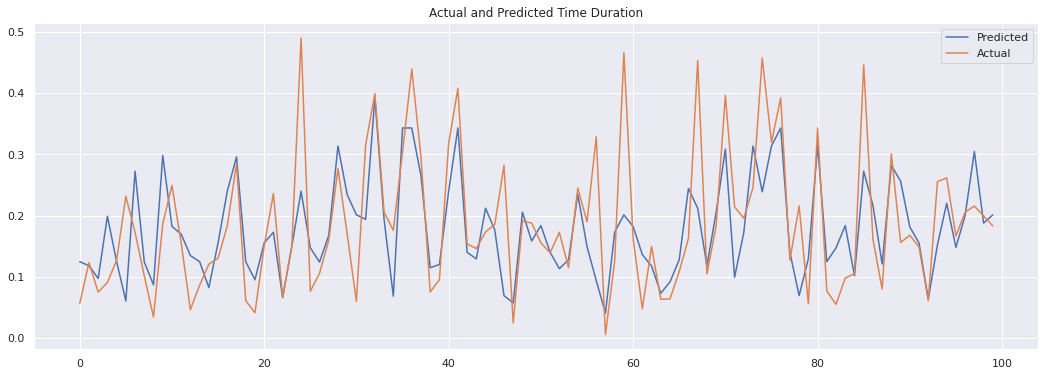

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_dt_test)

In [ ]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour',
       'minute', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [ ]:

dt_optimal_model.feature_importances_

array([9.38968142e-04, 4.43967868e-05, 9.14398484e-03, 4.52624602e-03,
       1.10728367e-02, 5.23422795e-02, 7.95299356e-01, 1.13750226e-03,
       9.12148562e-02, 1.38090212e-03, 0.00000000e+00, 0.00000000e+00,
       1.15545919e-03, 1.85697790e-03, 1.27165769e-02, 1.60198960e-02,
       7.31804693e-04, 1.33113813e-04, 2.84843170e-04])

In [ ]:

importances = dt_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance            0.795299
8                   hour            0.091215
5       dropoff_latitude            0.052342
15            Day_Sunday            0.016020
14          Day_Saturday            0.012717
4      dropoff_longitude            0.011073
2       pickup_longitude            0.009144
3        pickup_latitude            0.004526
13            Day_Monday            0.001857
9                 minute            0.001381
12            Day_Friday            0.001155
7                  month            0.001138
0              vendor_id            0.000939
16          Day_Thursday            0.000732
18         Day_Wednesday            0.000285
17           Day_Tuesday            0.000133
1        passenger_count            0.000044
11  store_and_fwd_flag_Y            0.000000
10  store_and_fwd_flag_N            0.000000

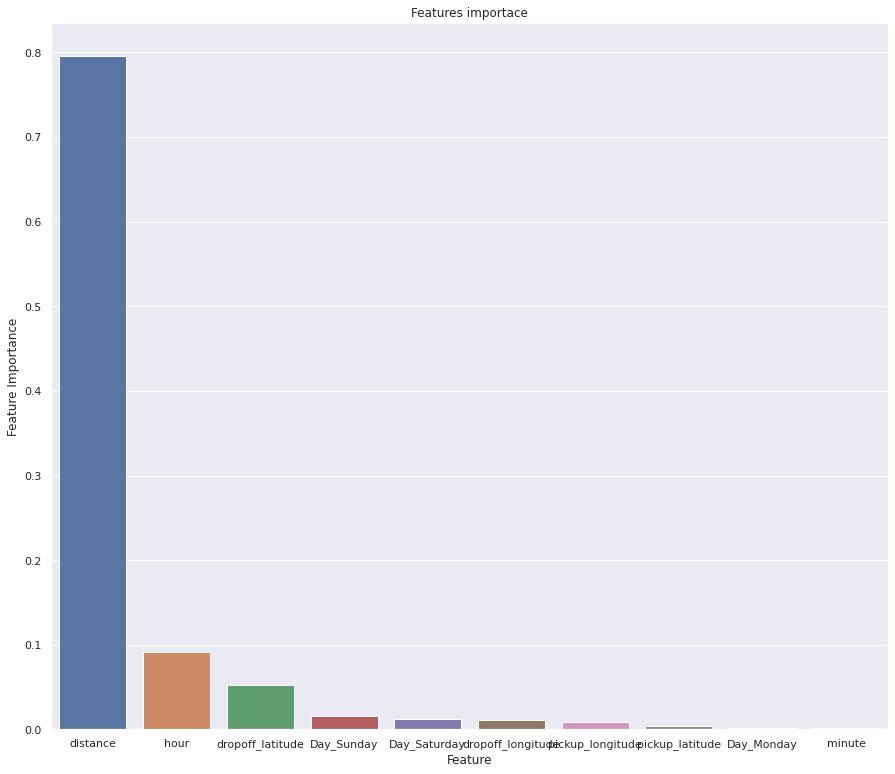

In [ ]:
plt.figure(figsize=(15,13))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
graph = Source(tree.export_graphviz(dt_optimal_model, out_file=None,feature_names=X_train.columns, filled = True))
display(SVG(graph.pipe(format='svg')))  

### Regularization

Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting. 

### Lasso Regression

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

In [ ]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
lasso_regressor.score(X_train, y_train)

0.4977738411443343

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  0.49743409794998145


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

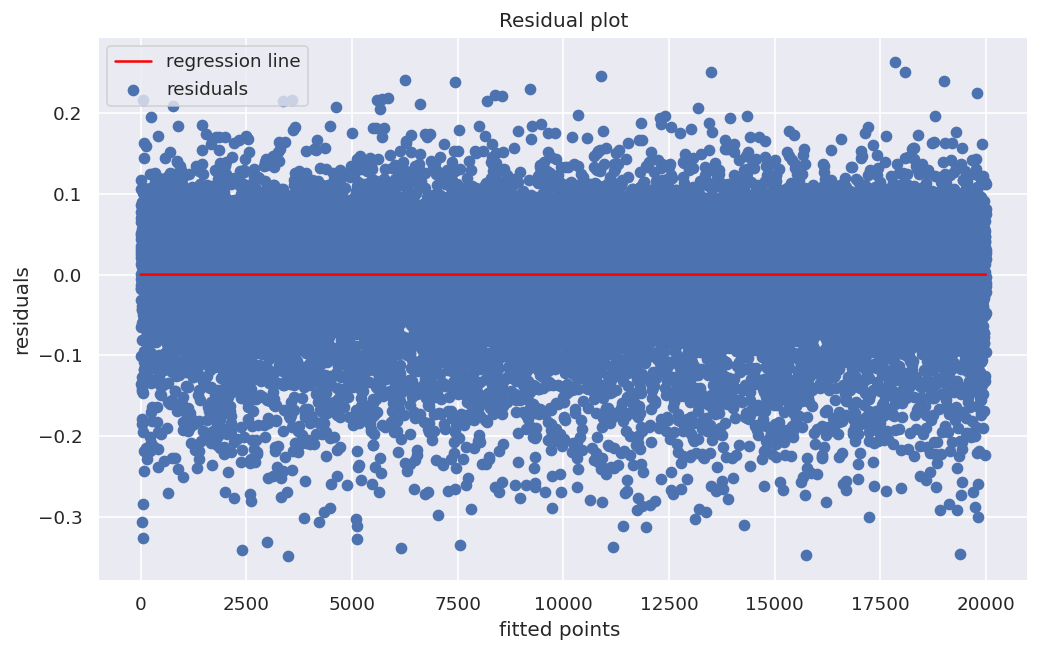

In [ ]:
#Heteroskedasticity
residuals=y_pred_lasso-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.4977738411443343 Adjusted R2 : 0.4976545326044711


(0.0055, 0.07416198487095663, 0.4977738411443343, 0.4976545326044711)

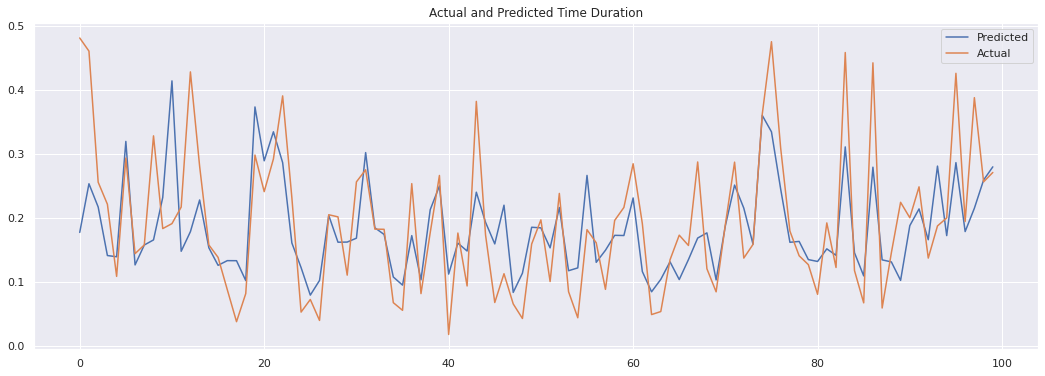

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_lasso_train)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.49596398499944283 Adjusted R2 : 0.49548467147166453


(0.0055, 0.07416198487095663, 0.49596398499944283, 0.49548467147166453)

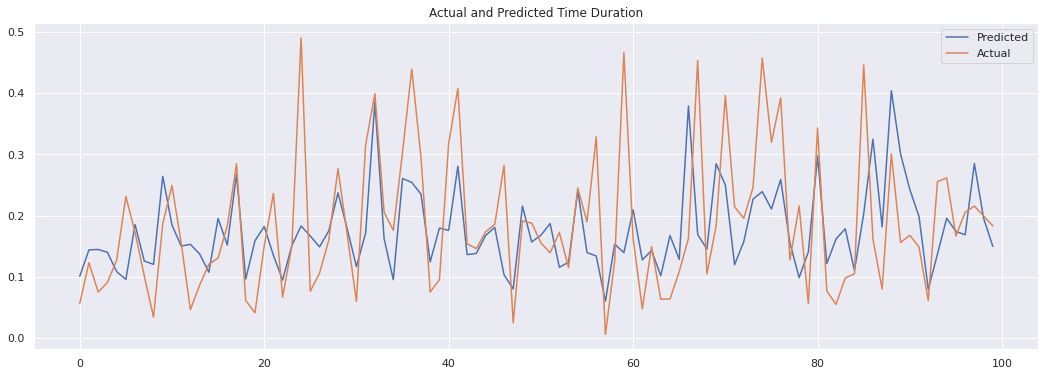

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_lasso)

### Ridge Regression

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.

In [ ]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
ridge_regressor.score(X_train, y_train)

0.49777368658851806

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 60}

Using  {'alpha': 60}  the negative mean squared error is:  0.49743409794998145


In [ ]:

y_pred_ridge_test = ridge_regressor.predict(X_test)
y_pred_ridge_train=ridge_regressor.predict(X_train)

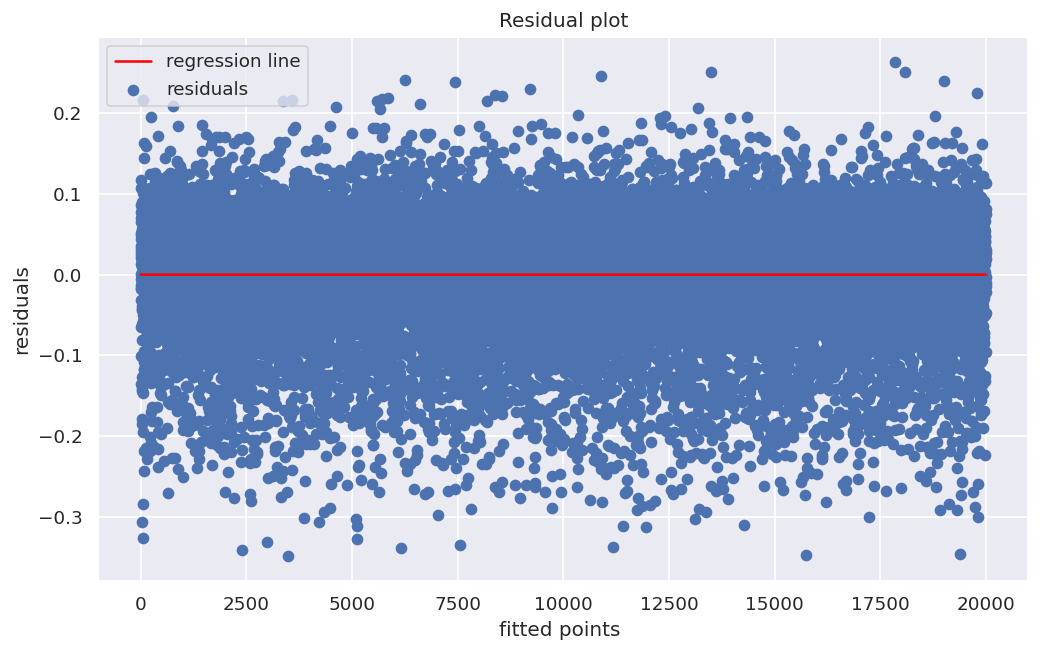

In [ ]:
#Heteroskedasticity
residuals=y_pred_ridge_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.49777368658851806 Adjusted R2 : 0.4976543780119387


(0.0055, 0.07416198487095663, 0.49777368658851806, 0.4976543780119387)

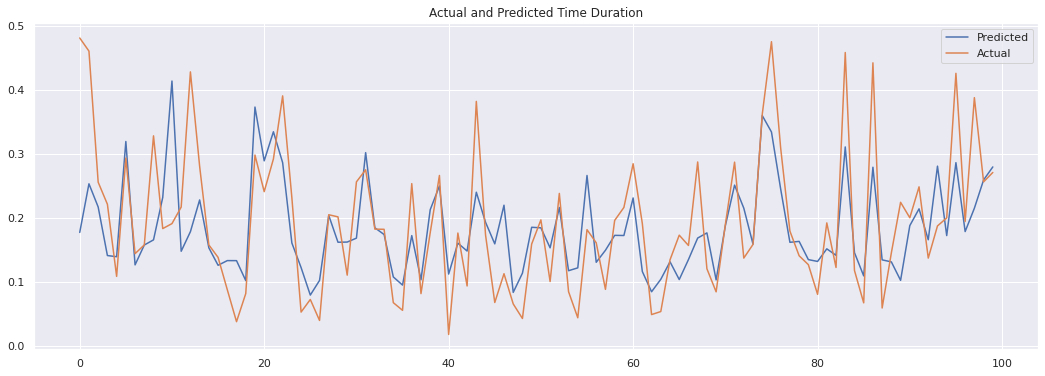

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_ridge_train)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.49596611110990285 Adjusted R2 : 0.49548679960395137


(0.0055, 0.07416198487095663, 0.49596611110990285, 0.49548679960395137)

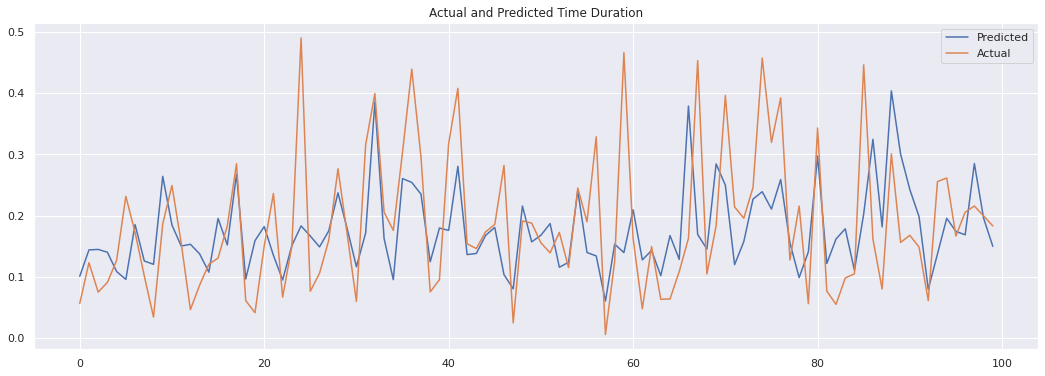

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_ridge_test)

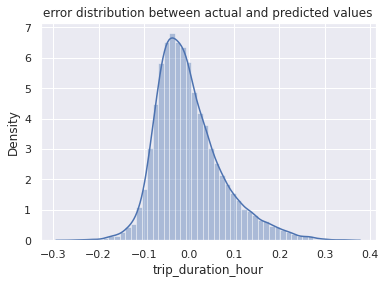

In [ ]:
sns.distplot(y_test - y_pred_ridge_test ).set_title("error distribution between actual and predicted values")
plt.show()

### XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way

In [ ]:
# Number of trees
n_estimators = [50,100,120]

# Maximum depth of trees
max_depth = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split
              }

In [ ]:
# Create an instance of the  XGBRegressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="r2")

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[06:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   5.1s
[06:35:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.8s
[06:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.6s
[06:35:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=   7.1s
[06:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [ ]:
xgb_grid.best_score_

0.7026666685416957

In [ ]:
xgb_grid.best_params_

{'max_depth': 9, 'min_samples_split': 40, 'n_estimators': 120}

In [ ]:
xgb_optimal_model =xgb_grid.best_estimator_

In [ ]:
y_pred_xgb_test=xgb_optimal_model.predict(X_test)
y_pred_xgb_train=xgb_optimal_model.predict(X_train)


MSE : 0.002 RMSE : 0.044721359549995794
R2 : 0.8221519859766687 Adjusted R2 : 0.8221097365109717


(0.002, 0.044721359549995794, 0.8221519859766687, 0.8221097365109717)

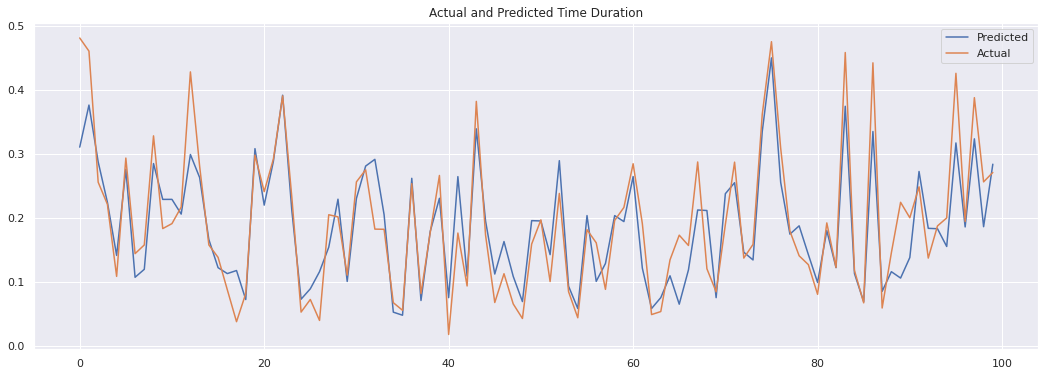

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_xgb_train)

MSE : 0.0031 RMSE : 0.055677643628300216
R2 : 0.7102902292633624 Adjusted R2 : 0.7100147294813806


(0.0031, 0.055677643628300216, 0.7102902292633624, 0.7100147294813806)

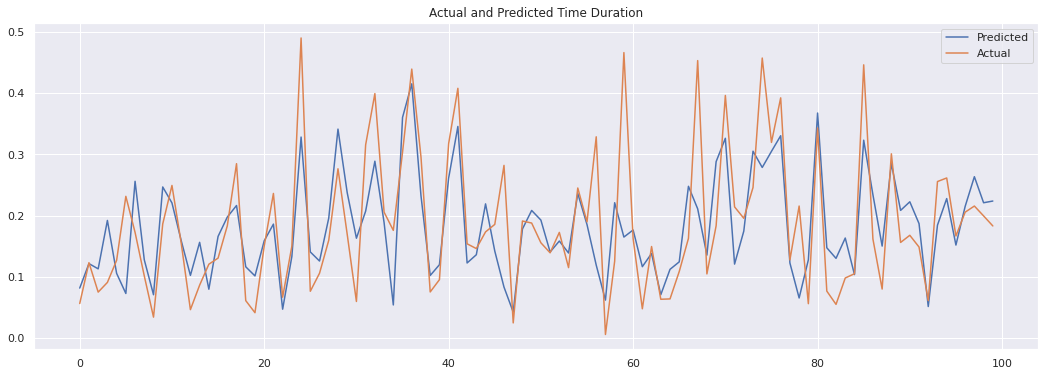

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_xgb_test)

In [ ]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour',
       'minute', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [ ]:
xgb_optimal_model.feature_importances_

array([0.00625629, 0.00633789, 0.01918391, 0.01993586, 0.02414751,
       0.04146331, 0.43513972, 0.01926788, 0.08249865, 0.01088677,
       0.01079909, 0.        , 0.01828299, 0.05281273, 0.07541084,
       0.10604851, 0.02390587, 0.02580334, 0.02181888], dtype=float32)

In [ ]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance            0.435140
15            Day_Sunday            0.106049
8                   hour            0.082499
14          Day_Saturday            0.075411
13            Day_Monday            0.052813
5       dropoff_latitude            0.041463
17           Day_Tuesday            0.025803
4      dropoff_longitude            0.024148
16          Day_Thursday            0.023906
18         Day_Wednesday            0.021819
3        pickup_latitude            0.019936
7                  month            0.019268
2       pickup_longitude            0.019184
12            Day_Friday            0.018283
9                 minute            0.010887
10  store_and_fwd_flag_N            0.010799
1        passenger_count            0.006338
0              vendor_id            0.006256
11  store_and_fwd_flag_Y            0.000000

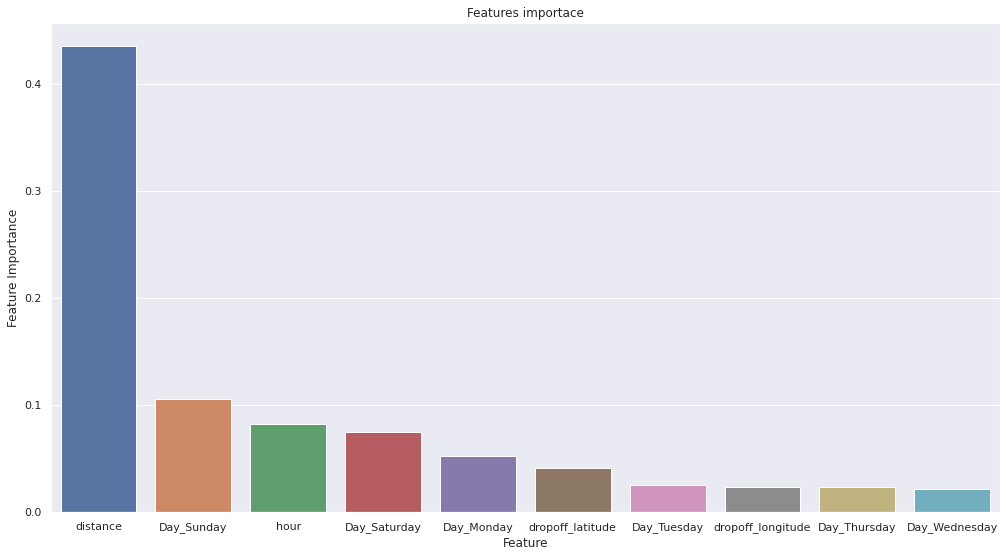

In [ ]:
plt.figure(figsize=(17,9))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

### GradientBoosting

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees

In [ ]:
# Number of trees
n_estimators = [100,120]

# Maximum depth of trees
max_depth = [5,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,80]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]


# HYperparameter Grid
param_gb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_gb,
                       cv = 3, verbose=2, scoring='r2')

gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  24.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  23.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  23.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  28.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  28.2s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  27.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  23.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  24.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  23.1s
[CV] END max_depth=5,

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [100, 120]},
             scoring='r2', verbose=2)

In [ ]:
gb_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 80,
 'n_estimators': 120}

In [ ]:

gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=10, min_samples_leaf=50,
                          min_samples_split=80, n_estimators=120)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
y_preds_gb = gb_optimal_model.predict(X_test)
y_pred_gb_train=gb_optimal_model.predict(X_train)

MSE : 0.0023 RMSE : 0.04795831523312719
R2 : 0.7946145685424261 Adjusted R2 : 0.7945657773046455


(0.0023, 0.04795831523312719, 0.7946145685424261, 0.7945657773046455)

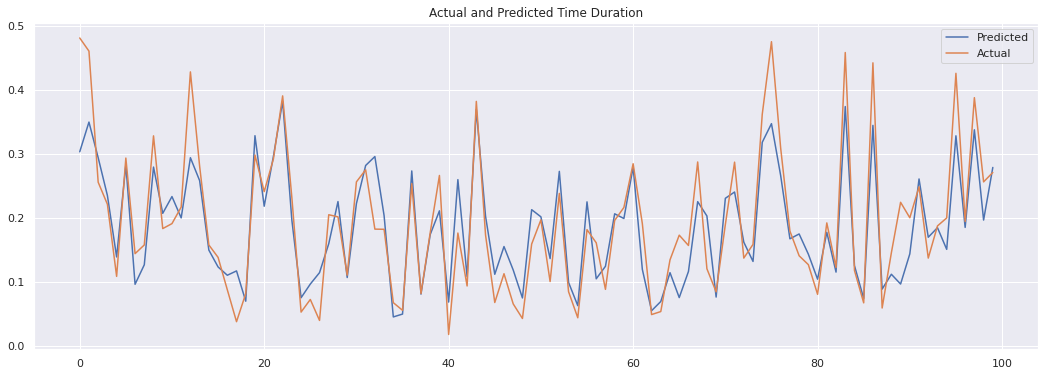

In [ ]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_gb_train)

MSE : 0.0031 RMSE : 0.055677643628300216
R2 : 0.7124076969454535 Adjusted R2 : 0.7121342107713776


(0.0031, 0.055677643628300216, 0.7124076969454535, 0.7121342107713776)

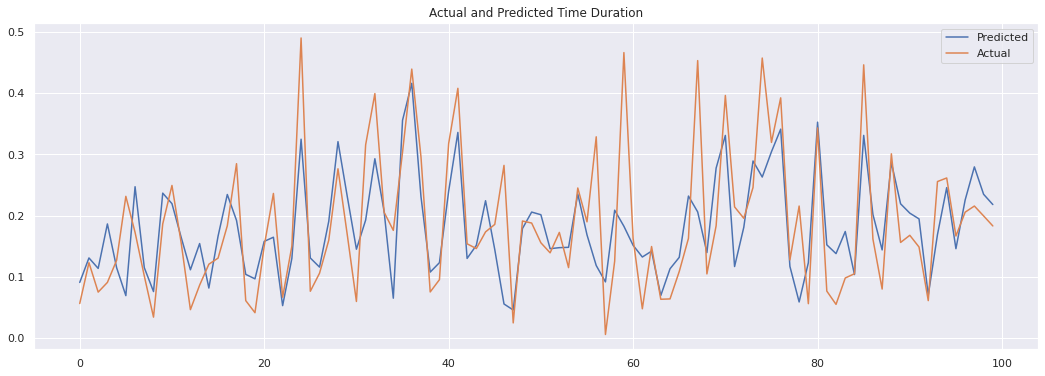

In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_preds_gb)

In [ ]:

xgb_optimal_model.feature_importances_

array([0.00625629, 0.00633789, 0.01918391, 0.01993586, 0.02414751,
       0.04146331, 0.43513972, 0.01926788, 0.08249865, 0.01088677,
       0.01079909, 0.        , 0.01828299, 0.05281273, 0.07541084,
       0.10604851, 0.02390587, 0.02580334, 0.02181888], dtype=float32)

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance            0.657715
8                   hour            0.089069
5       dropoff_latitude            0.074091
4      dropoff_longitude            0.044228
2       pickup_longitude            0.042394
3        pickup_latitude            0.034390
15            Day_Sunday            0.015044
14          Day_Saturday            0.013166
7                  month            0.008119
9                 minute            0.007355
13            Day_Monday            0.004189
12            Day_Friday            0.002055
0              vendor_id            0.001982
16          Day_Thursday            0.001969
18         Day_Wednesday            0.001802
17           Day_Tuesday            0.001761
1        passenger_count            0.000664
10  store_and_fwd_flag_N            0.000005
11  store_and_fwd_flag_Y            0.000000

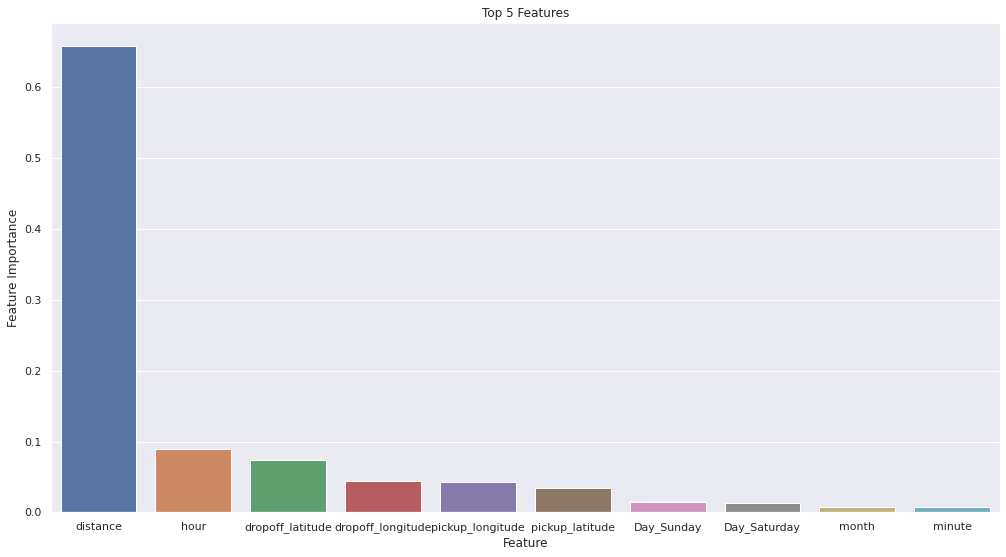

In [ ]:
plt.figure(figsize=(17,9))
plt.title('Top 5 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

### Light GBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:
- Faster training speed and higher efficiency.

- Lower memory usage.

- Better accuracy.

- Support of parallel, distributed, and GPU learning.

- Capable of handling large-scale data.

In [1]:
from lightgbm import LGBMRegressor

In [80]:
# Applying LightGBM
n_estimator=[5,10,20] # No. of tree
max_depth=[5,7,9] # max depth of tree
min_samples_split=[40,50]
params={"n_estimator":n_estimator,"max_depth":max_depth,"min_samples_split":min_samples_split}
lgb=LGBMRegressor()
gs_lgb=GridSearchCV(lgb,params,cv=3,verbose=2,scoring='r2')
gs_lgb.fit(X_train,y_train)
print(gs_lgb.best_score_)
print(gs_lgb.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   3.4s
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   3.1s
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   3.9s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; total time=   2.0s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; total time=   0.7s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; total time=   0.7s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=20; total time=   0.8s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=20; total time=   0.7s
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=20; total time=   0.7s
[CV] END ...max_depth=5, min_samples_split=50, n_estimator=5; total time=   0.7s
[CV] END ...max_depth=5, min_samples_split=50, n_estimator=5; total time=   0.7s
[CV] END ...max_depth=5, min_samples_split=50, n

In [81]:
gs_lgb.best_estimator_

LGBMRegressor(max_depth=9, min_samples_split=40, n_estimator=5)

In [82]:
gs_lgb_opt_model = gs_lgb.best_estimator_

In [83]:
y_preds_lgb = gs_lgb_opt_model.predict(X_test)
y_pred_lgb_train=gs_lgb_opt_model.predict(X_train)

MSE : 0.0033 RMSE : 0.05744562646538029
R2 : 0.7012762377478683 Adjusted R2 : 0.7012052731131748


(0.0033, 0.05744562646538029, 0.7012762377478683, 0.7012052731131748)

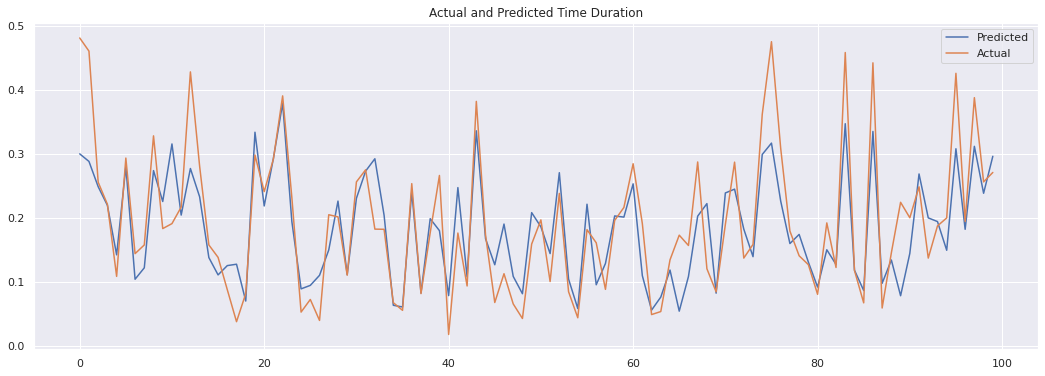

In [86]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_lgb_train)

MSE : 0.0034 RMSE : 0.058309518948453
R2 : 0.6850215927460219 Adjusted R2 : 0.6847220637301148


(0.0034, 0.058309518948453, 0.6850215927460219, 0.6847220637301148)

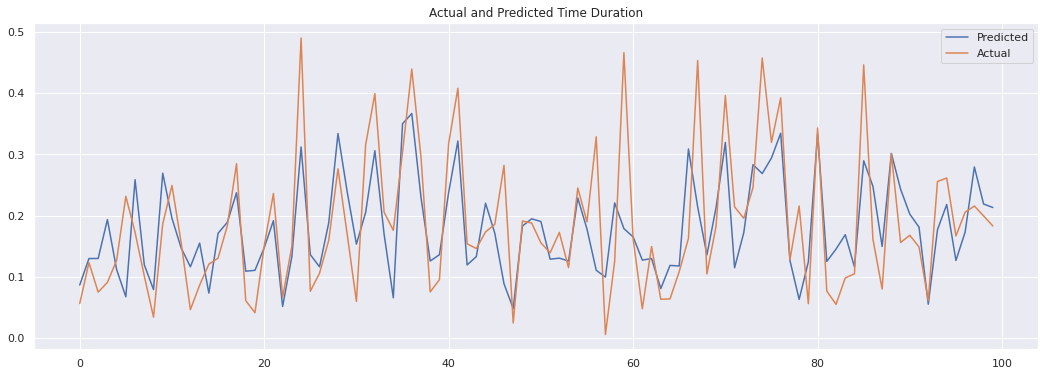

In [87]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_preds_lgb)

In [88]:
importances = gs_lgb_opt_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [89]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
8                   hour                 503
5       dropoff_latitude                 497
4      dropoff_longitude                 402
2       pickup_longitude                 389
6               distance                 349
3        pickup_latitude                 331
14          Day_Saturday                 120
15            Day_Sunday                 100
7                  month                  81
13            Day_Monday                  55
9                 minute                  54
0              vendor_id                  28
17           Day_Tuesday                  24
12            Day_Friday                  21
16          Day_Thursday                  17
18         Day_Wednesday                  16
1        passenger_count                  13
11  store_and_fwd_flag_Y                   0
10  store_and_fwd_flag_N                   0

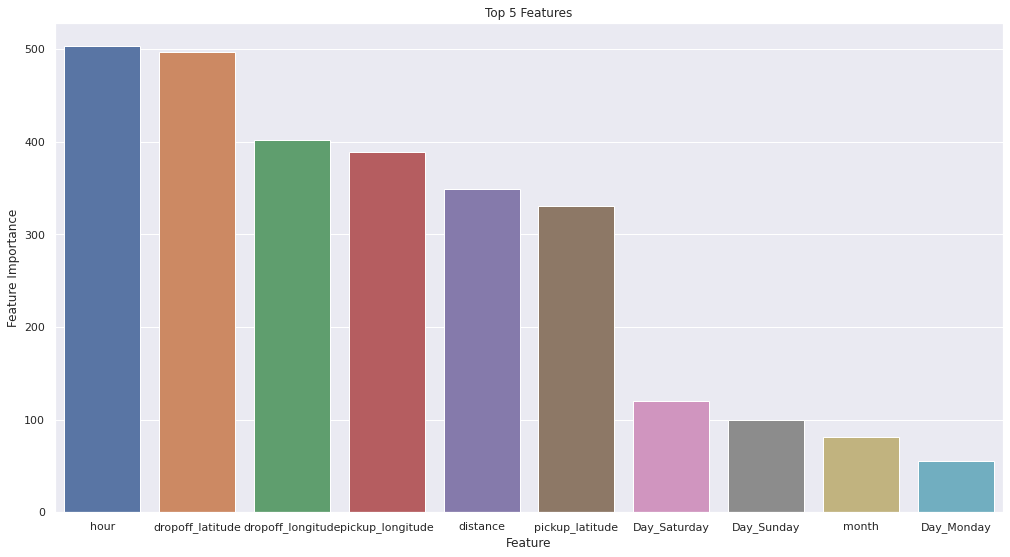

In [90]:
plt.figure(figsize=(17,9))
plt.title('Top 5 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])